## Carga de librerías

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns

In [3]:
gpdfinal3 = gpd.read_file("data/06_colima/colima.gpkg")
gpdfinal3.head()

,CVEGEO,NOM_MUN,NOM_LOC,POB_TOTAL,$CO$,$HCHO$,$NO_2$,$O_3$,$SO_2$,GM_2020,...,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,AMBITO,geometry
0,0601000010288,Colima-VA,Ciudad de Villa de Álvarez,2557.0,1.000000,1.000000,1.000,1.000000,1.000,0.50,...,36,40,317,167,124,695,325,154,None,"POLYGON ((2318933.513 810638.283, 2319025.867 ..."
1,0600200010483,Colima-VA,Colima,742.0,0.977823,0.972755,0.885,0.965726,0.870,0.50,...,10,12,97,49,39,221,58,24,None,"POLYGON ((2319196.848 804654.646, 2319197.508 ..."
2,0600200010464,Colima-VA,Colima,90.0,0.639113,0.657921,0.577,0.641129,0.609,0.50,...,0,3,3,0,0,18,10,4,None,"POLYGON ((2320207.018 803190.824, 2320268.911 ..."
3,0601000010305,Colima-VA,Ciudad de Villa de Álvarez,1115.0,0.659274,0.648840,0.654,0.663306,0.630,0.00,...,18,10,156,62,65,360,80,31,None,"POLYGON ((2317155.357 810763.574, 2317160.203 ..."
4,0600200011320,Colima-VA,Colima,1520.0,0.597782,0.594349,0.558,0.584677,0.478,0.25,...,10,12,167,68,80,384,276,146,None,"POLYGON ((2315751.665 805258.386, 2315730.950 ..."


In [4]:
mun_group = gpdfinal3.groupby("NOM_MUN", as_index=False).agg({"POBTOT":"sum"})
mun_group.sort_values(by="POBTOT", ascending=False, inplace=True)
mun_group.head()

,NOM_MUN,POBTOT
4,Tecomán,15605
1,Cuauhtémoc,11817
0,Colima-VA,6024
3,Minatitlán,6018
2,Manzanillo,3612


## Pop Estado y Municipio

In [5]:
censo2020ageb = pd.read_csv("data\censo2020\conjunto_de_datos_ageb_urbana_06_cpv2020.csv")
censo2020ageb.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,6,Colima,0,Total de la entidad Colima,0,Total de la entidad,0000,0,731391,370769,...,80251,206736,132395,114164,43881,22695,9173,12085,82366,2698
1,6,Colima,1,Armería,0,Total del municipio,0000,0,27626,13686,...,1955,7125,2636,3927,501,277,539,734,5097,193
2,6,Colima,1,Armería,1,Total de la localidad urbana,0000,0,15368,7632,...,1305,3912,1569,1862,387,186,227,379,2637,87
3,6,Colima,1,Armería,1,Total AGEB urbana,0081,0,1389,708,...,159,371,182,194,54,16,22,44,240,8
4,6,Colima,1,Armería,1,Ciudad de Armería,0081,1,41,18,...,5,12,4,4,*,0,*,*,10,0


In [6]:
censo2020ageb.drop(columns=["ENTIDAD","MUN","LOC", "MZA"], inplace=True)

In [7]:
# replace * by 0
censo2020ageb = censo2020ageb.replace("*", 0)

# make columns numeric
for col in censo2020ageb.columns[4:]:
  censo2020ageb[col] = pd.to_numeric(censo2020ageb[col])

In [8]:
censo2020ageb.head()

,NOM_ENT,NOM_MUN,NOM_LOC,AGEB,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,Colima,Total de la entidad Colima,Total de la entidad,0000,731391,370769,360622,29614,14483,15131,...,80251,206736,132395,114164,43881,22695,9173,12085,82366,2698
1,Colima,Armería,Total del municipio,0000,27626,13686,13940,1238,606,632,...,1955,7125,2636,3927,501,277,539,734,5097,193
2,Colima,Armería,Total de la localidad urbana,0000,15368,7632,7736,659,315,344,...,1305,3912,1569,1862,387,186,227,379,2637,87
3,Colima,Armería,Total AGEB urbana,0081,1389,708,681,45,20,25,...,159,371,182,194,54,16,22,44,240,8
4,Colima,Armería,Ciudad de Armería,0081,41,18,23,0,0,0,...,5,12,4,4,0,0,0,0,10,0


In [9]:
pop = censo2020ageb[censo2020ageb["AGEB"] != "0000"]
pop = pop[pop["NOM_LOC"] != "Total AGEB urbana"]

In [10]:
pop

,NOM_ENT,NOM_MUN,NOM_LOC,AGEB,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
4,Colima,Armería,Ciudad de Armería,0081,41,18,23,0,0,0,...,5,12,4,4,0,0,0,0,10,0
5,Colima,Armería,Ciudad de Armería,0081,30,18,12,0,0,0,...,5,9,5,0,4,0,0,0,5,0
6,Colima,Armería,Ciudad de Armería,0081,35,18,17,0,0,0,...,3,13,7,3,4,0,0,0,6,0
7,Colima,Armería,Ciudad de Armería,0081,15,7,8,0,0,0,...,0,3,0,0,0,0,0,0,4,0
8,Colima,Armería,Ciudad de Armería,0081,29,18,11,0,0,0,...,4,10,3,5,0,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14737,Colima,Villa de Álvarez,Ciudad de Villa de Álvarez,138A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14738,Colima,Villa de Álvarez,Ciudad de Villa de Álvarez,138A,63,31,32,3,0,3,...,0,18,9,7,4,5,0,0,7,0
14739,Colima,Villa de Álvarez,Ciudad de Villa de Álvarez,138A,14,8,6,0,0,0,...,0,4,0,0,0,0,0,0,4,0
14740,Colima,Villa de Álvarez,Ciudad de Villa de Álvarez,138A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
pop_ent = pop.groupby("NOM_ENT", as_index=False).agg({"POBTOT":"sum"})
pop_ent.head()

,NOM_ENT,POBTOT
0,Colima,660999


In [12]:
pop_mun = pop.groupby("NOM_MUN", as_index=False).agg({"POBTOT":"sum"})
pop_mun.sort_values(by="POBTOT", ascending=False, inplace=True)
pop_mun

,NOM_MUN,POBTOT
6,Manzanillo,172159
9,Villa de Álvarez,147496
1,Colima,146965
8,Tecomán,108878
4,Cuauhtémoc,23005
0,Armería,21759
3,Coquimatlán,17192
2,Comala,14485
7,Minatitlán,6075
5,Ixtlahuacán,2985


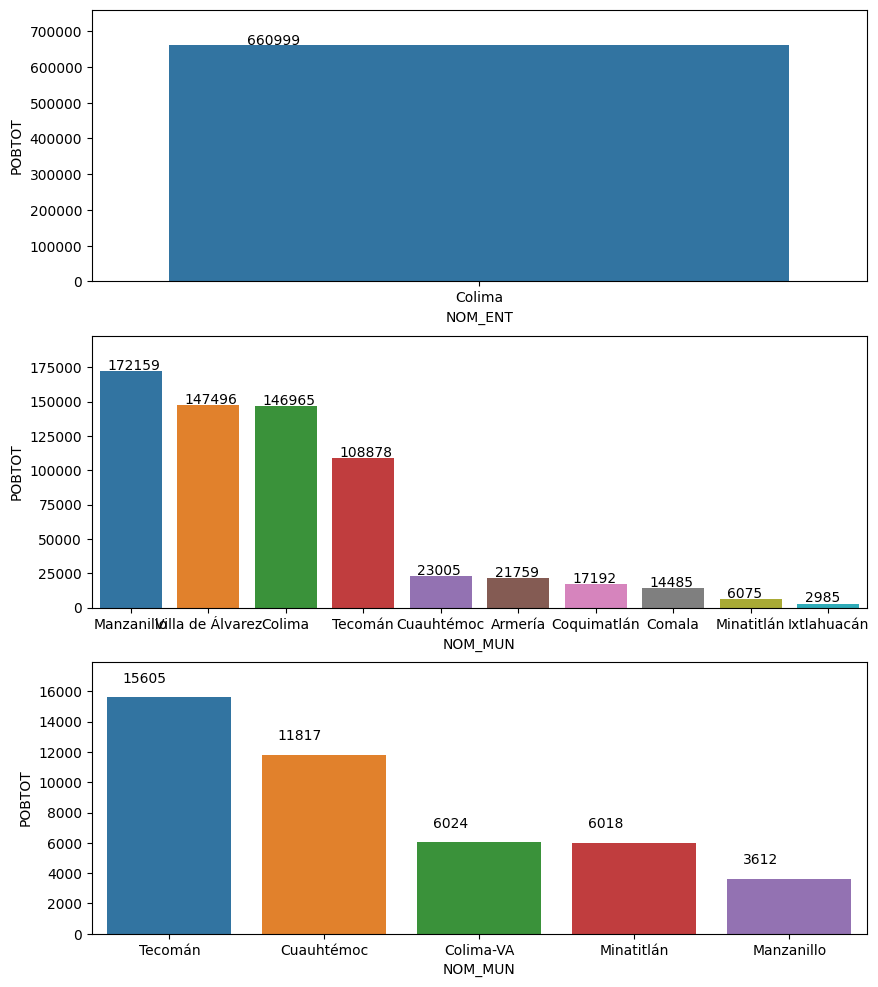

In [13]:
fig, ax = plt.subplots(nrows=3, figsize=(10,12))



for i,df in enumerate([pop_ent, pop_mun, mun_group]):
  

  sns.barplot(data=df, x=df.columns[0], y="POBTOT", ax=ax[i])

  # Show values at the top of the bars
  for p in ax[i].patches:
      ax[i].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1000))

  # set ylimit from 0 to max value + 15% of max value
  ax[i].set_ylim(0, max(df.POBTOT) * 1.15)

plt.show()

In [14]:
1500000/9000

166.66666666666666

In [15]:
1.5E6/9000

166.66666666666666

In [16]:
1.5E6 / 8000

187.5

In [17]:
gpdfinal3

,CVEGEO,NOM_MUN,NOM_LOC,POB_TOTAL,$CO$,$HCHO$,$NO_2$,$O_3$,$SO_2$,GM_2020,...,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,AMBITO,geometry
0,0601000010288,Colima-VA,Ciudad de Villa de Álvarez,2557.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,...,36,40,317,167,124,695,325,154,None,"POLYGON ((2318933.513 810638.283, 2319025.867 ..."
1,0600200010483,Colima-VA,Colima,742.0,0.977823,0.972755,0.885000,0.965726,0.870000,0.500000,...,10,12,97,49,39,221,58,24,None,"POLYGON ((2319196.848 804654.646, 2319197.508 ..."
2,0600200010464,Colima-VA,Colima,90.0,0.639113,0.657921,0.577000,0.641129,0.609000,0.500000,...,0,3,3,0,0,18,10,4,None,"POLYGON ((2320207.018 803190.824, 2320268.911 ..."
3,0601000010305,Colima-VA,Ciudad de Villa de Álvarez,1115.0,0.659274,0.648840,0.654000,0.663306,0.630000,0.000000,...,18,10,156,62,65,360,80,31,None,"POLYGON ((2317155.357 810763.574, 2317160.203 ..."
4,0600200011320,Colima-VA,Colima,1520.0,0.597782,0.594349,0.558000,0.584677,0.478000,0.250000,...,10,12,167,68,80,384,276,146,None,"POLYGON ((2315751.665 805258.386, 2315730.950 ..."
5,0600500010235,Cuauhtémoc,Cuauhtémoc,1746.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,...,28,19,191,84,77,470,170,62,None,"POLYGON ((2332862.872 815228.808, 2332886.663 ..."
6,0600500180038,Cuauhtémoc,Quesería,3341.0,0.878788,0.742754,0.865052,0.889610,1.000000,0.666667,...,65,71,355,177,166,826,512,264,None,"POLYGON ((2335418.685 822464.041, 2335379.410 ..."
7,0600500010112,Cuauhtémoc,Cuauhtémoc,2186.0,0.824916,0.807971,0.799308,0.827922,0.816667,0.333333,...,22,21,243,101,103,552,356,182,None,"POLYGON ((2332653.005 816171.286, 2332661.060 ..."
8,0600500180080,Cuauhtémoc,Quesería,2639.0,0.646465,0.547101,0.602076,0.655844,0.725000,0.333333,...,38,60,318,134,152,641,434,204,None,"POLYGON ((2335898.967 822177.868, 2335916.981 ..."
9,0600500010108,Cuauhtémoc,Cuauhtémoc,1905.0,0.683502,0.677536,0.667820,0.688312,0.545833,0.333333,...,10,16,162,47,65,427,444,234,None,"POLYGON ((2332023.193 815938.794, 2332036.358 ..."


In [18]:
gpdfinal3.columns

Index(['CVEGEO', 'NOM_MUN', 'NOM_LOC', 'POB_TOTAL', '$CO$', '$HCHO$', '$NO_2$',
       '$O_3$', '$SO_2$', 'GM_2020', 'densidad', 'metrica', 'AGEB', 'NOM_ENT',
       'POBTOT', 'POBFEM', 'POBMAS', 'P_0A2', 'P_0A2_F', 'P_0A2_M', 'P_3YMAS',
       'P_3YMAS_F', 'P_3YMAS_M', 'P_5YMAS', 'P_5YMAS_F', 'P_5YMAS_M',
       'P_12YMAS', 'P_12YMAS_F', 'P_12YMAS_M', 'P_15YMAS', 'P_15YMAS_F',
       'P_15YMAS_M', 'P_18YMAS', 'P_18YMAS_F', 'P_18YMAS_M', 'P_3A5',
       'P_3A5_F', 'P_3A5_M', 'P_6A11', 'P_6A11_F', 'P_6A11_M', 'P_8A14',
       'P_8A14_F', 'P_8A14_M', 'P_12A14', 'P_12A14_F', 'P_12A14_M', 'P_15A17',
       'P_15A17_F', 'P_15A17_M', 'P_18A24', 'P_18A24_F', 'P_18A24_M',
       'P_15A49_F', 'P_60YMAS', 'P_60YMAS_F', 'AMBITO', 'geometry'],
      dtype='object')

In [28]:
gdf = gpdfinal3[["AGEB","NOM_MUN","POB_TOTAL","metrica", "densidad", "geometry"]]
print(gdf.NOM_MUN.unique())
gdf.head()

['Colima-VA' 'Cuauhtémoc' 'Manzanillo' 'Minatitlán' 'Tecomán']


,AGEB,NOM_MUN,POB_TOTAL,metrica,densidad,geometry
0,0288,Colima-VA,2557.0,5.59,0.086242,"POLYGON ((2318933.513 810638.283, 2319025.867 ..."
1,0483,Colima-VA,742.0,5.19,0.022587,"POLYGON ((2319196.848 804654.646, 2319197.508 ..."
2,0464,Colima-VA,90.0,3.62,0.000000,"POLYGON ((2320207.018 803190.824, 2320268.911 ..."
3,0305,Colima-VA,1115.0,3.31,0.055441,"POLYGON ((2317155.357 810763.574, 2317160.203 ..."
4,1320,Colima-VA,1520.0,3.15,0.086242,"POLYGON ((2315751.665 805258.386, 2315730.950 ..."


In [29]:
gdf["value"] = [1,2,3,4,5]*5 + [1,1,1]
gdf.head()

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,AGEB,NOM_MUN,POB_TOTAL,metrica,densidad,geometry,value
0,0288,Colima-VA,2557.0,5.59,0.086242,"POLYGON ((2318933.513 810638.283, 2319025.867 ...",1
1,0483,Colima-VA,742.0,5.19,0.022587,"POLYGON ((2319196.848 804654.646, 2319197.508 ...",2
2,0464,Colima-VA,90.0,3.62,0.000000,"POLYGON ((2320207.018 803190.824, 2320268.911 ...",3
3,0305,Colima-VA,1115.0,3.31,0.055441,"POLYGON ((2317155.357 810763.574, 2317160.203 ...",4
4,1320,Colima-VA,1520.0,3.15,0.086242,"POLYGON ((2315751.665 805258.386, 2315730.950 ...",5


Int64Index([10, 11, 12, 13, 14, 25], dtype='int64')